In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('p3_dataset/data3_house_data.csv')
y = data['SalePrice']
x = data.drop(columns=['SalePrice'])
x = x.drop(columns=['Id'])
x=(x-x.mean())/x.std()
X_train, y_train, X_test, y_test = np.array(x[0:1001]), np.array(y[0:1001]), np.array(x[1001:]), np.array(y[1001:])
print(X_train)
print(y_test)

[[-2.07694849e-01 -1.89426797e-01  1.02052179e+00  1.68625409e-01
  -2.22250989e-01  1.48381500e-01]
 [ 4.09729971e-01 -4.43650370e-02  1.70480503e-01  1.68625409e-01
  -2.22250989e-01 -6.02917233e-01]
 [-8.42098851e-02  1.63767054e-01  9.57555770e-01  1.68625409e-01
  -2.22250989e-01  1.48381500e-01]
 ...
 [ 6.15538244e-01  2.90488277e-02  1.11497082e+00  1.68625409e-01
  -2.22250989e-01 -1.35421596e+00]
 [-1.88657584e-03  1.59730552e-01  6.74208674e-01  1.68625409e-01
  -2.22250989e-01  1.65097896e+00]
 [ 3.37336911e+00  2.75275398e-01  5.48276631e-01  1.40246986e+00
  -2.22250989e-01  1.65097896e+00]]
[113000 134500 125000 112000 229456  80500  91500 115000 134000 143000
 137900 184000 145000 214000 147000 367294 127000 132500 101800 130000
 138887 175500 195000 142500 265900 224900 248328 170000 465000 178000
 186500 129500 119000 244000 130000 165400 127500 301500  99900 190000
 151000 128900 180500 181000 183900 122000 378500 144000 177000 139000
 137000 237000  68400 227000 1800

I'm going to train a linear regression model using 10 training data and calculate the mse
on test data and then increase the training data ten by ten till 1000 and calculate mse
on test data each time and see how it changes. What do I expect? I expect the error to be
reduced steadily because we all believe that more training data is better.

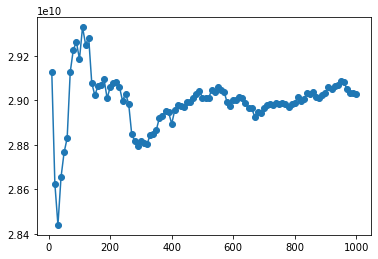

In [3]:
import matplotlib.pyplot as plt

%run ../regression.ipynb

step = np.array([])
mse = np.array([])

for i in range(10, 1001, 10):
    reg = regression(1)
    reg.train(X_train[0:i, :], y_train[0:i])
    step = np.append(step, i)
    mse = np.append(mse, mean_squared_error(y_test, reg.predict(X_test)))

plt.plot(step, mse, '-o')
plt.show()

As you see, the diagram looks like to have no reason behind. I can think of some possibilities but at the end I have
no idea.<br/>
1. The data we add may have a bias or be noisy
2. Double-descent<br/>
It's not even that much like double-descent but it may be a concern.<br/>
A surprising situation, called double-descent, also occurs when size of the training set is close to the number of model
parameters. In these cases, the test risk first decreases as the size of the training set increases, transiently increases
when a bit more training data is added, and finally begins decreasing again as the training set continues to grow.
This phenomena was reported 25 years in the neural network literature (see Opper, 1995), but occurs in modern networks too
(Advani and Saxe, 2017). Interestingly, this happens even for a linear regression, albeit one fit by SGD (Nakkiran, 2019).
This phenomenon is not yet totally understood and is largely of theoretical interest: I certainly wouldn't use it as a
reason not to collect more data (though I might fiddle with the training set size if n==p and the performance were
unexpectedly bad).


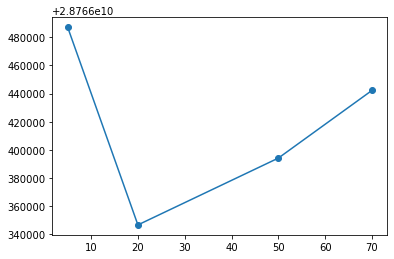

In [4]:
lambdas = [5, 20, 50, 70]
mse = np.array([])
X_train_50, y_train_50 = X_train[0:50, :], y_train[0:50]

for lam in lambdas:
    reg = regression(1)
    reg.train(X_train_50, y_train_50, lam=lam)
    mse = np.append(mse, mean_squared_error(y_test, reg.predict(X_test)))

plt.plot(lambdas, mse, '-o')
plt.show()

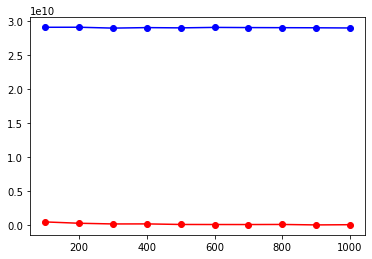

In [9]:
step = np.array([])
mse_avg = np.array([])
mse_std = np.array([])

for i in range(100, 1001, 100):
    mse = np.array([])
    for j in range(0, 10):
        reg = regression(1)
        index = np.random.choice(X_train.shape[0], i)
        reg.train(X_train[index, :], y_train[index])
        mse = np.append(mse, mean_squared_error(y_test, reg.predict(X_test)))

    step = np.append(step, i)
    mse_avg = np.append(mse_avg, mse.mean())
    mse_std = np.append(mse_std, mse.std())

plt.plot(step, mse_avg, '-o', c='blue')
plt.plot(step, mse_std, '-o', c='red')
plt.show()

More training data doesn't change mean or standard deviation of error and I think that's reasonable cause we are choosing
data randomly.